<a href="https://colab.research.google.com/github/Guhan2348519/ADVANCED-ML-tasks/blob/main/Copy_of_2348548_DL_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import plotly.express as px
from sklearn.metrics import precision_recall_curve, confusion_matrix
from tensorflow.keras.optimizers import SGD as sgd1

In [ ]:
df = pd.read_csv("fraudTest.csv")
df

C:\Users\saida\AppData\Local\Temp\ipykernel_11884\3277605098.py:1: DtypeWarning:

Columns (1,3,4,6,7,8,9,10,11,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.



,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0.0,6/21/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,3/19/1968,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1.0,6/21/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302.0,"Sales professional, IT",1/17/1990,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2.0,6/21/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496.0,"Librarian, public",10/21/1970,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3.0,6/21/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767.0,Set designer,7/25/1987,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4.0,6/21/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126.0,Furniture designer,7/6/1955,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
555715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
555716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
555717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df= df.dropna() # drop rows with nan values
print(df)

       Unnamed: 0 trans_date_trans_time        cc_num  \
0             0.0       6/21/2020 12:14  2.291160e+15   
1             1.0       6/21/2020 12:14  3.573030e+15   
2             2.0       6/21/2020 12:14  3.598220e+15   
3             3.0       6/21/2020 12:15  3.591920e+15   
4             4.0       6/21/2020 12:15  3.526830e+15   
...           ...                   ...           ...   
55540     55540.0       7/10/2020 16:32  3.564180e+15   
55541     55541.0       7/10/2020 16:32  3.598300e+15   
55542     55542.0       7/10/2020 16:33  4.239440e+12   
55543     55543.0       7/10/2020 16:33  3.566090e+15   
55544     55544.0       7/10/2020 16:33  4.973530e+18   

                                   merchant        category    amt     first  \
0                     fraud_Kirlin and Sons   personal_care   2.86      Jeff   
1                      fraud_Sporer-Keebler   personal_care  29.84    Joanne   
2      fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28    Ashle

In [ ]:
# Removing unnamed columns using drop function
df.drop(df.columns[df.columns.str.contains(
    'unnamed', case=False)], axis=1, inplace=True)

C:\Users\saida\AppData\Local\Temp\ipykernel_11884\2021542417.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cc_num,55545.0,4.149806e+17,1.305494e+18,6.041621e+10,1.800360e+14,3.518760e+15,4.629450e+15,4.992350e+18
amt,55545.0,6.939229e+01,1.477316e+02,1.000000e+00,9.750000e+00,4.722000e+01,8.290000e+01,1.314915e+04
zip,55545.0,4.871251e+04,2.680578e+04,1.257000e+03,2.623700e+04,4.815400e+04,7.201100e+04,9.978300e+04
lat,55545.0,3.853665e+01,5.079983e+00,2.002710e+01,3.462050e+01,3.937160e+01,4.201440e+01,6.568990e+01
long,55545.0,-9.014365e+01,1.365280e+01,-1.656723e+02,-9.678690e+01,-8.745690e+01,-8.015800e+01,-6.795030e+01
city_pop,55545.0,9.046478e+04,3.048360e+05,2.300000e+01,7.430000e+02,2.443000e+03,2.032800e+04,2.906700e+06
unix_time,55545.0,1.372619e+09,4.828081e+05,1.371817e+09,1.372204e+09,1.372595e+09,1.373061e+09,1.373474e+09
merch_lat,55545.0,3.853424e+01,5.114789e+00,1.904232e+01,3.473648e+01,3.937071e+01,4.197451e+01,6.666936e+01
merch_long,55545.0,-9.014148e+01,1.366546e+01,-1.666463e+02,-9.682895e+01,-8.736880e+01,-8.022212e+01,-6.695560e+01
is_fraud,55545.0,3.888739e-03,6.223895e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [ ]:
df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
df.shape

(55545, 22)

In [ ]:
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

C:\Users\saida\AppData\Local\Temp\ipykernel_11884\3545306239.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\saida\AppData\Local\Temp\ipykernel_11884\3545306239.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\saida\AppData\Local\Temp\ipykernel_11884\3545306239.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [ ]:
df['is_fraud'].unique()

array([0., 1.])

In [ ]:
fraud_counts = df['is_fraud'].value_counts()

fig = px.pie(names=fraud_counts.index, values=fraud_counts.values, title='Fraudulent Transactions Distribution')

fig.show()

In [ ]:
No_class = df[df["is_fraud"]==0]
yes_class = df[df["is_fraud"]==1]
#Balancing data
No_class = resample(No_class, replace=False, n_samples=len(yes_class))
down_samples = pd.concat([yes_class, No_class], axis=0)

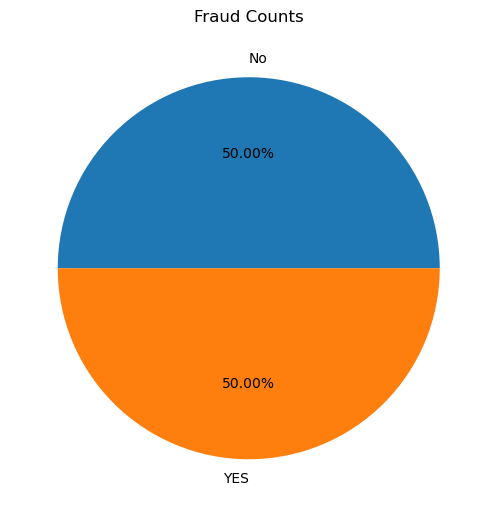

In [ ]:
fraud = down_samples["is_fraud"].value_counts()
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.pie(fraud, labels=["No", "YES"], autopct="%.2f%%")
plt.title("Fraud Counts")
plt.tight_layout()
plt.show()

In [ ]:
X = down_samples.drop(columns=['is_fraud', 'trans_date_trans_time', 'dob', 'trans_num'])
y = down_samples["is_fraud"]

In [ ]:
X.shape

(432, 18)

In [ ]:
y.shape

(432,)

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#with 128 input nodes
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
#with 64 input nodes
model1 = Sequential()
model1.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model1.add(Dense(units=32, activation='relu'))
model1.add(Dense(units=1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#for 128 input nodes with adam
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10


11/11 [==============================] - 1s 12ms/step - loss: 0.6513 - accuracy: 0.6348 - val_loss: 0.5816 - val_accuracy: 0.7701
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5316 - accuracy: 0.8087 - val_loss: 0.5167 - val_accuracy: 0.7586
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 0.4511 - accuracy: 0.8435 - val_loss: 0.4601 - val_accuracy: 0.7701
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3876 - accuracy: 0.8609 - val_loss: 0.4167 - val_accuracy: 0.7931
Epoch 5/10
11/11 [==============================] - 0s 4ms/step - loss: 0.3357 - accuracy: 0.8812 - val_loss: 0.3814 - val_accuracy: 0.8391
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2976 - accuracy: 0.8928 - val_loss: 0.3505 - val_accuracy: 0.8851
Epoch 7/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2637 - accuracy: 0.9072 - val_loss: 0.3277 - val_accuracy: 0.8966
Epoch 8/10
11/11 [============

In [ ]:
#for 64 input nodes with adam
model1.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
11/11 [==============================] - 1s 12ms/step - loss: 0.6984 - accuracy: 0.5304 - val_loss: 0.6554 - val_accuracy: 0.5862
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 0.6302 - accuracy: 0.6957 - val_loss: 0.6100 - val_accuracy: 0.7586
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5826 - accuracy: 0.7623 - val_loss: 0.5740 - val_accuracy: 0.7586
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5365 - accuracy: 0.7884 - val_loss: 0.5410 - val_accuracy: 0.7471
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 0.4941 - accuracy: 0.8145 - val_loss: 0.5129 - val_accuracy: 0.7816
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 0.4538 - accuracy: 0.8319 - val_loss: 0.4825 - val_accuracy: 0.7931
Epoch 7/10
11/11 [==============================] - 0s 3ms/step - loss: 0.4157 - accuracy: 0.8406 - val_loss: 0.4500 - val_accuracy: 0.8046
Epoch 8/10
11/11 [=

In [ ]:
loss1, accuracy1 = model.evaluate(X_test, y_test)
loss2, accuracy2 = model1.evaluate(X_test, y_test)
print('Model accuracy(128 nodes): ', accuracy1)
print('Model accuracy(64 nodes): ', accuracy2)

3/3 [==============================] - 0s 6ms/step - loss: 0.3783 - accuracy: 0.8736
Model accuracy(128 nodes):  0.9195402264595032
Model accuracy(64 nodes):  0.8735632300376892


In [ ]:
pred1 = model.predict(X_test)
precision1, recall1, thresholds1 = precision_recall_curve(y_test, pred1)
pred2 = model1.predict(X_test)
precision2, recall2, thresholds2 = precision_recall_curve(y_test, pred2)

3/3 [==============================] - 0s 0s/step


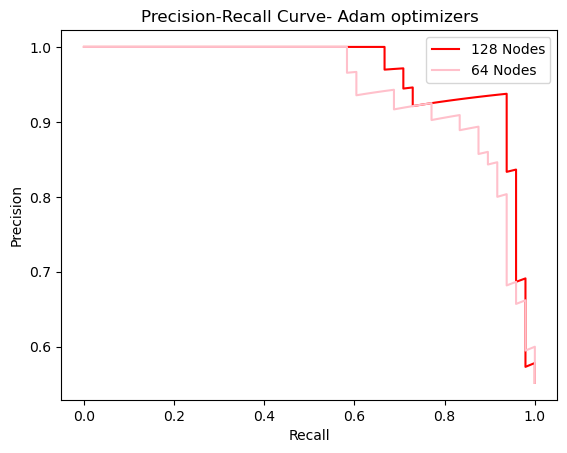

In [ ]:
labels = ['64 Nodes', '128 Nodes']
plt.plot(recall1, precision1, color='red', label=labels[1])
plt.plot(recall2, precision2, color='pink', label=labels[0])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve- Adam optimizers')
plt.legend()
plt.show()

Confusion Matrix:
[[35  4]
 [ 3 45]]


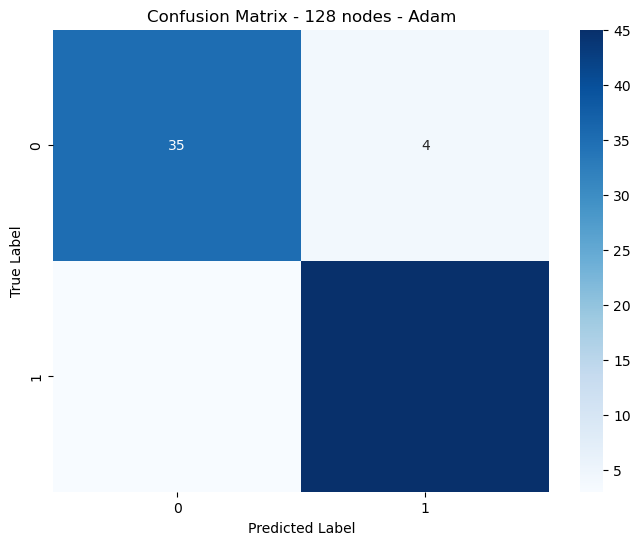

In [ ]:
# Confusion Matrix
confusion_matrix_result = confusion_matrix(y_test, pred1.round())
print('Confusion Matrix:')
print(confusion_matrix_result)

plt.figure(figsize=(8, 6))  # Set a larger figure size
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - 128 nodes - Adam')
plt.show()


[[34  5]
 [ 6 42]]


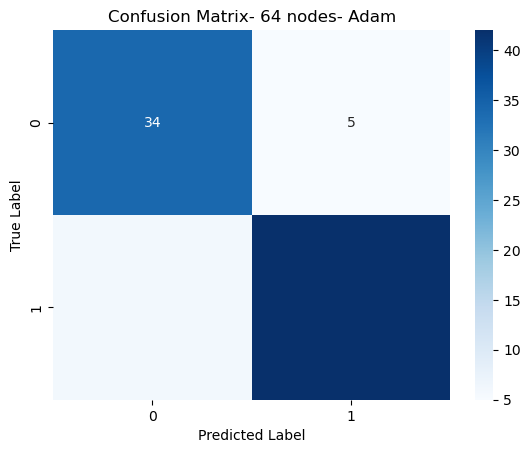

In [ ]:
confusion_matrix_result = confusion_matrix(y_test, pred2.round())
print(confusion_matrix_result)
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix- 64 nodes- Adam')
plt.show()

In [ ]:
sgd_optimizer = sgd1(learning_rate=0.01)
#using legacy tensorflow for model and keras for model1
sgd_optimizer1 = SGD(learning_rate=0.01)

In [ ]:
#for 128 input nodes with SGD
sgd_optimizer.build(model.trainable_variables)
model.compile(optimizer=sgd_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#for 64 input nodes with SGD
sgd_optimizer1.build(model1.trainable_variables)
model1.compile(optimizer=sgd_optimizer1, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
11/11 [==============================] - 0s 12ms/step - loss: 0.1822 - accuracy: 0.9362 - val_loss: 0.2894 - val_accuracy: 0.9310
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 0.1805 - accuracy: 0.9362 - val_loss: 0.2893 - val_accuracy: 0.9310
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 0.1791 - accuracy: 0.9420 - val_loss: 0.2896 - val_accuracy: 0.9310
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 0.1774 - accuracy: 0.9449 - val_loss: 0.2894 - val_accuracy: 0.9310
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 0.1763 - accuracy: 0.9478 - val_loss: 0.2888 - val_accuracy: 0.9310
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 0.1747 - accuracy: 0.9478 - val_loss: 0.2890 - val_accuracy: 0.9310
Epoch 7/10
11/11 [==============================] - 0s 3ms/step - loss: 0.1736 - accuracy: 0.9478 - val_loss: 0.2891 - val_accuracy: 0.9310
Epoch 8/10
11/11 [=

In [ ]:
model1.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
11/11 [==============================] - 1s 13ms/step - loss: 0.3011 - accuracy: 0.8986 - val_loss: 0.3760 - val_accuracy: 0.8736
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2979 - accuracy: 0.8986 - val_loss: 0.3738 - val_accuracy: 0.8736
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2946 - accuracy: 0.8986 - val_loss: 0.3717 - val_accuracy: 0.8736
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2914 - accuracy: 0.9014 - val_loss: 0.3696 - val_accuracy: 0.8736
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2886 - accuracy: 0.9014 - val_loss: 0.3677 - val_accuracy: 0.8851
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2857 - accuracy: 0.9043 - val_loss: 0.3657 - val_accuracy: 0.8851
Epoch 7/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2827 - accuracy: 0.9043 - val_loss: 0.3638 - val_accuracy: 0.8851
Epoch 8/10
11/11 [=

In [ ]:
loss3, accuracy3 = model.evaluate(X_test, y_test)
print('Model accuracy(128 nodes): ', accuracy3)
loss4, accuracy4 = model1.evaluate(X_test, y_test)
print('Model accuracy(64 nodes): ', accuracy4)

3/3 [==============================] - 0s 8ms/step - loss: 0.2890 - accuracy: 0.9310
Model accuracy(128 nodes):  0.931034505367279
3/3 [==============================] - 0s 8ms/step - loss: 0.3585 - accuracy: 0.8966
Model accuracy(64 nodes):  0.8965517282485962


In [ ]:
pred3 = model.predict(X_test)
precision3, recall3, thresholds3 = precision_recall_curve(y_test, pred3)
pred4 = model1.predict(X_test)
precision4, recall4, thresholds4 = precision_recall_curve(y_test, pred4)

3/3 [==============================] - 0s 8ms/step


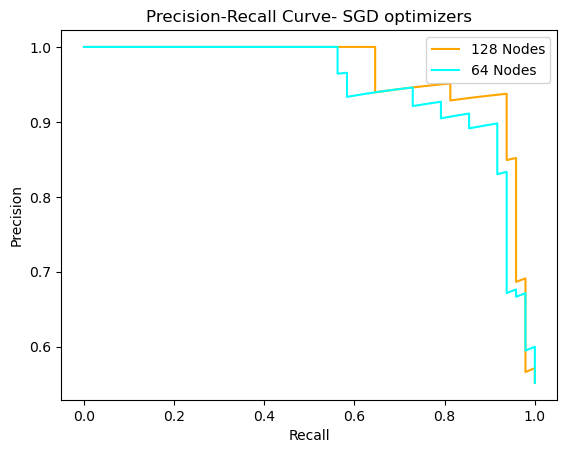

In [ ]:
labels = ['64 Nodes', '128 Nodes']
plt.plot(recall3, precision3, color='orange', label=labels[1])
plt.plot(recall4, precision4, color='cyan', label=labels[0])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve- SGD optimizers')
plt.legend()
plt.show()

[[36  3]
 [ 3 45]]


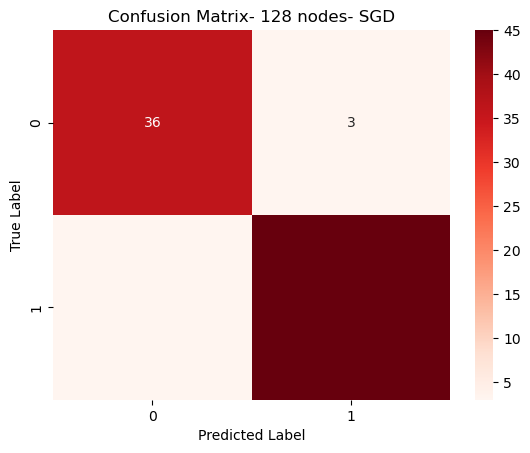

In [ ]:
confusion_matrix_result = confusion_matrix(y_test, pred3.round())
print(confusion_matrix_result)
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix- 128 nodes- SGD')
plt.show()

[[34  5]
 [ 4 44]]


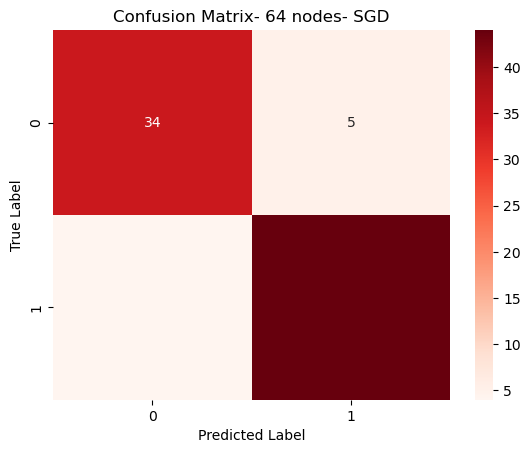

In [ ]:
confusion_matrix_result = confusion_matrix(y_test, pred4.round())
print(confusion_matrix_result)
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix- 64 nodes- SGD')
plt.show()